Name   : V.V.S.K.Karthik

RollNO : E21025

MailID : velamuri.kkarthik@praxis.ac.in

## Case Study Statement


- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

- After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

- Our objective is to categorise the countries which requires help based on socio-economic and health factors which determines the overall development of the countries

# 1. Importing required Libraries

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

## 2.Reading the country-data.csv file 

In [3]:
#Read the csv file and print first 5 rows of the file
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Data Description

In [4]:
#Displaying the number of rows and columns in the data
data.shape

(167, 10)

## Observation:

   - We have 167 rows and 10 columns in our data

country : Name of the country

child_mort : Death of children under 5 years of age per 1000 live births

exports : Exports of goods and services per capita. Given as %age of the GDP per capita

health : Total health spending per capita. Given as %age of GDP per capita

imports : Imports of goods and services per capita. Given as %age of the GDP per capita

income : Net income per person

inflation : The measurement of the annual growth rate of the Total GDP

life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same

gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population

In [5]:
#Displaying data types and non-Null value count of all columns
data.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Insights:
   - Income and gdpp is in integer format which is as expected,Column country is in Object format which is as ecpected.
   - Columns: child_mort,exports,health,imports,inflation,life_expec and total_fer is in float format which is as expected.
   - Datatype of all columns is as expected,Datatype handling is not required for this dataset.

In [6]:
#Statistical Summary of the dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 3. Inspecting Missing Values

In [7]:
# Verify null value count for all columns
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Observation:

   - We have 0 Null values in all the columns.SO Null value treatment is not required for this dataset.

## 4.Data Validation

In [8]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In our dataframe, the features - 'imports', 'exports' and 'health' variable are present as percentage of GDP per capita, and
this can sometimes give a incorrect insight in our EDA. for example, the health spending of 'Afganistan' is 7.58 and that of
'Albania' is '6.55', both of which are very close to each other in health spending in terms of their % of GDP per capita.
But these figures do not actually tell us the real story of how rich and poor are 'USA' and 'Sierra Leone' is. So the best way
to tackle it is to convert the % values to absolute values.

### Convert columns/features: exports,health and imports to their original values, Since the data given is percentage of the GDP per capita

In [9]:
# convert columns/features: exports,health and imports to their original values 
data['exports']=data['gdpp']/data['exports']
data['health']=data['gdpp']/data['health']
data['imports']=data['gdpp']/data['imports']
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.300000,72.955145,12.316258,1610,9.44,56.2,5.82,553
1,Albania,16.6,146.071429,624.427481,84.156379,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,116.145833,1069.544365,142.038217,12900,16.10,76.5,2.89,4460
3,Angola,119.0,56.661316,1238.596491,82.284382,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,268.131868,2023.217247,207.130730,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,63.733906,565.714286,56.356736,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,473.684211,2749.490835,767.045455,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,18.194444,191.520468,16.334165,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,43.666667,252.895753,38.081395,4480,23.60,67.5,4.67,1310


## Insights:
   - Since the following features : `exports`, `health` and `imports` are given in the form of percenatge of GDP we have converted to their original values in the above step which will help for further analysis

## Negative Value Check

### Lets validate that we dont have negative values in the data.Negative values in the data may indicate the false data in some of the features

In [10]:
data[data['child_mort']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [11]:
data[data['exports']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [12]:
data[data['health']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [13]:
data[data['imports']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [14]:
data[data['income']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [15]:
data[data['life_expec']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [16]:
data[data['total_fer']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [17]:
data[data['gdpp']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Insights:
   - We dont have negative values for the features 'child_mort, 'exports', 'health','imports', 'income', 'life_expec', 'total_fer' and 'gdpp', which is good sign we can go ahead with further steps.

In [18]:
data[data['inflation']<0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
10,Bahamas,13.8,800.000000,3548.795944,640.732265,22900,-0.393,73.8,1.86,28000
43,Czech Republic,3.4,300.000000,2512.690355,314.785374,28300,-1.430,77.5,1.51,19800
73,Ireland,4.2,472.815534,5299.238303,563.005780,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,2966.666667,4689.146470,3272.058824,35800,-1.900,82.8,1.39,44500
85,Latvia,7.8,210.428305,1691.616766,205.081670,18300,-0.812,73.1,1.36,11300
131,Seychelles,14.4,115.138593,3176.470588,100.000000,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,233.000000,11767.676768,267.816092,72100,-0.046,82.7,1.15,46600
135,Slovenia,3.2,363.919129,2486.716259,372.019078,28700,-0.987,79.5,1.57,23400


## Insights:

   - Some countries have Negative inflaton which is possible actually. So lets not remove them at this point of analysis.   We can treat them in further analysis if required.


## 5.Univariate Analysis

In [19]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.300000,72.955145,12.316258,1610,9.44,56.2,5.82,553
1,Albania,16.6,146.071429,624.427481,84.156379,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,116.145833,1069.544365,142.038217,12900,16.10,76.5,2.89,4460
3,Angola,119.0,56.661316,1238.596491,82.284382,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,268.131868,2023.217247,207.130730,19100,1.44,76.8,2.13,12200


In [20]:
# Reusable method of boxplot for performing univariate analysis

def univ_anal(col_name):  # Pass feature name for making Box plot.
    plt.title('Data Distribution of '+ col_name+ ' column',size=15,color='green')
    sns.boxplot(y=data[col_name])    # Box plot can be drawn for the given feature.
    plt.ylabel(col_name,size=12)
    plt.show()

In [21]:
# Reusable method of histogram for performing univariate analysis
def Histogram (h,df):    # defining the histogram to plot numerical data.
        hist_plot = sns.histplot(x = h, data = df, bins = 20, color= 'green') # Plotting the histogram using seaborn.
        hist_plot.set(xlabel = h ,ylabel= 'Frequency' ,title = 'Histogram of ' + h ) # Setting the lables and title.
        # plt.savefig(h + ' ' +'Histogram.png')       # Saving the plot as an image(png) file in current directory
        plt.show() 

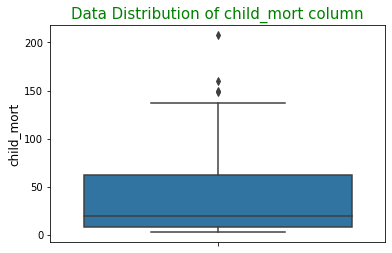

In [22]:
# Box plot for child_mort
# child_mort is a ratio scale data
# Plotted a boxplot from which we can also see if any outliers are present or not
univ_anal('child_mort')

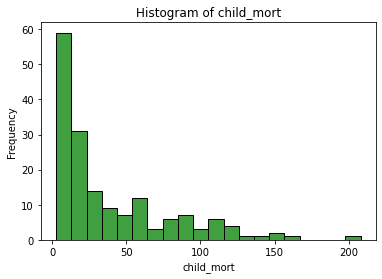

In [23]:
# Plotted a histogram to perform univariate analysis

Histogram('child_mort', data)

# Insights:

   - As observed child mortality tells us how many deaths out of 1000 children  in a country.We have few observations where child mortality rate is greater than 150 which is a serious consideration in our outcome.
   - High child_mort indicates countries which may indicate poor countries,lets consider this feature for further analysis.
   - This feature is strong indicator  who are required in help

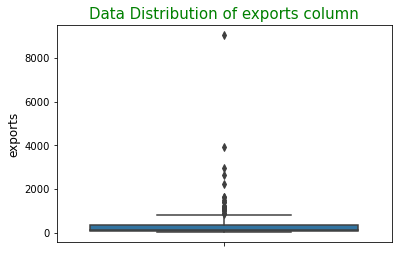

In [24]:
# Boxplot for exports column
univ_anal('exports')

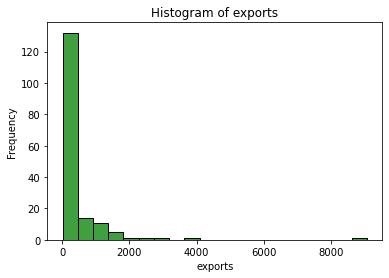

In [25]:
# Histogram for exports column
Histogram('exports', data)

## Insights:

   - exports indicates exporting of goods and services. We could see that their are outliers.
   - Let's cap this exports column which will help in avoiding skewness

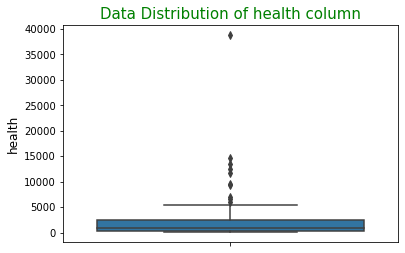

In [26]:
# Boxplot for Health column
univ_anal('health')

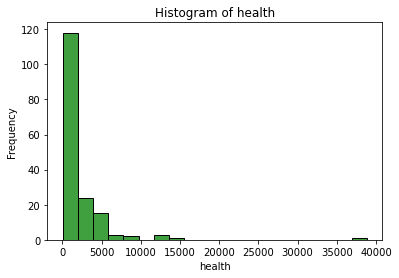

In [27]:
# Histogram for Health
Histogram('health', data)

## Insights:

   - As shown in the above boxplot health feature has outlier at the value near 40000 which look suspicious.Lets cap them at 0.95 percentile in further steps after analysing the distribution plot as well.
    

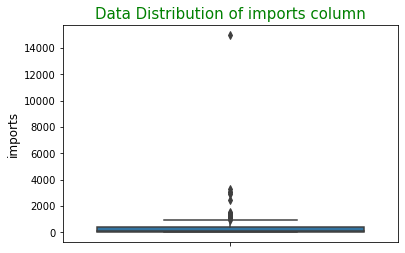

In [28]:
# Boxplot for imports column
univ_anal('imports')

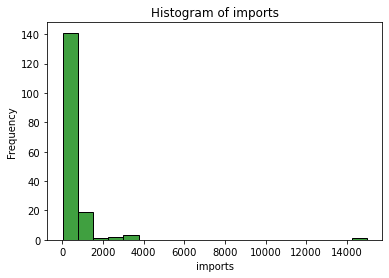

In [29]:
# Histogram for imports column
Histogram('imports',data)

## Insights:
    
   - As shown in the above boxplot imports feature has outlier near 14000 which is max value and it look suspicious. Lets cap them at 0.95 percentile
   -We also Noticed that there are huge set of values above 75th percentile.Since we have less data dropping them result in loss of data.Lets cap them at 0.95th percentile

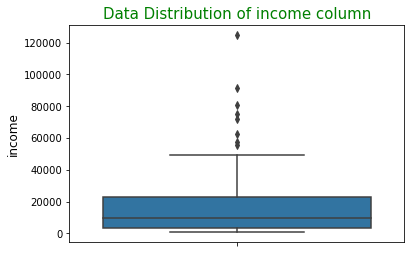

In [30]:
# Boxplot for income column
univ_anal('income')

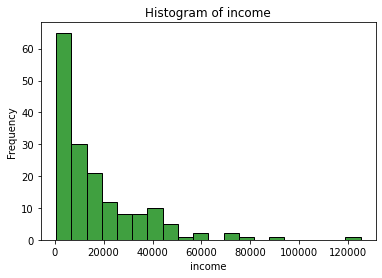

In [31]:
# Histogram for income column
Histogram('income',data)

# Insights:

   - As observed column income has huge set of outliers are visible in this feature.Lets cap them at 0.95
   - Column income has an outlier which looks suspicious at greater than 120000 let treat these values as well

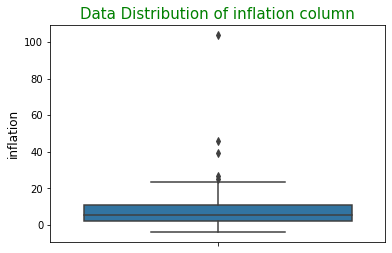

In [32]:
# Boxplot for inflation column
univ_anal('inflation')

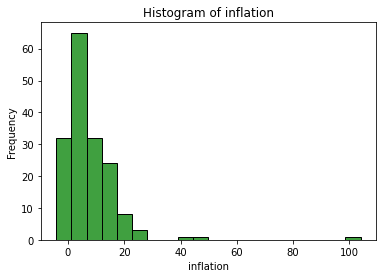

In [33]:
# Histogram for inflation column
Histogram('inflation', data)

## Insights:

   - As observed in the above box plot.We have outliers near 100 which looks suspicious.But there is a possibility of some countries having higher inflation.So lets not remove them.We will verify the distribution as well to better understand the data

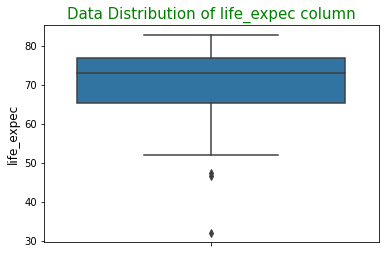

In [34]:
# Boxplot for life expectency
univ_anal('life_expec')

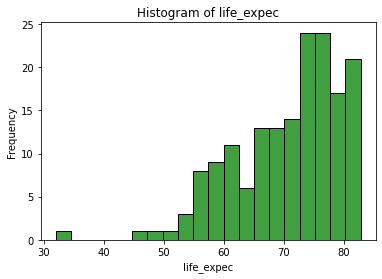

In [35]:
# Histogram for life expectency
Histogram('life_expec',data)

## Insights:

   - life_expec has some lower values near 32. And we have few more outliers near 46.Lets see the distribution plot and cap the outliers if required in the next steps.

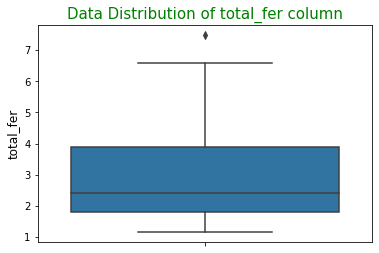

In [36]:
# Boxplot for total fertility
univ_anal('total_fer')

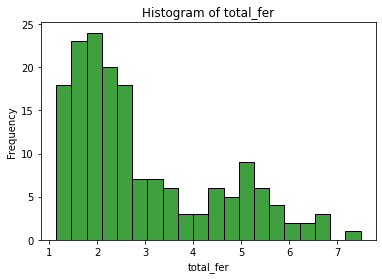

In [37]:
# Histogram for total fertility
Histogram('total_fer',data)

## Insights:

   - total_fer column has some good spread of data and nothing suspicious other than value near 7. Lets analyse the distribution of data and lets treat the outlier if required.
   - Value near 7 has a possibilty in fertility. so lets understand in further plots to treat if required.

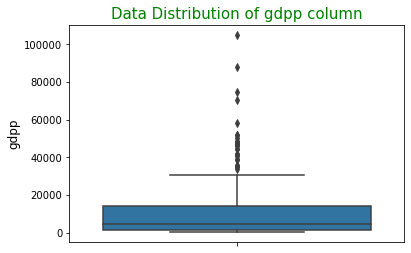

In [38]:
# Boxplot for GDP percapita
univ_anal('gdpp')

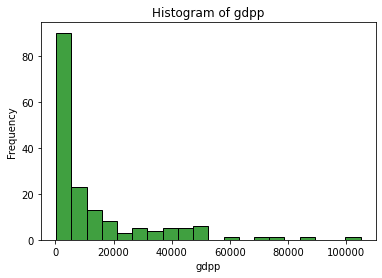

In [39]:
# Histogram for GDP percapita
Histogram('gdpp',data)

## Insights:

   - gdpp column is having some good amount of outliers.Lets understand the percentile values and cap them in further steps after verifying the distribution plot for the same

## Understanding the distribution of data 

In [40]:
# Defining a function to plot a distribution plot of the data 
def distplot(d,data):
    sns.distplot(data[d])
    plt.title('Distribution of '+ d,size=15,color='green')
    plt.show()

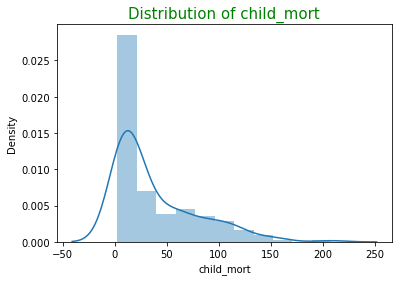

In [41]:
# Distplot for child mortality
distplot('child_mort',data)

## Insights:

   - As shown above child_mort feature is right skewed. Which is quite common since some countries have the possibilty of this type of numbers which are high in child_mort.
   - child_mort feature gives good insights in finding the countries which require help from orphanages.

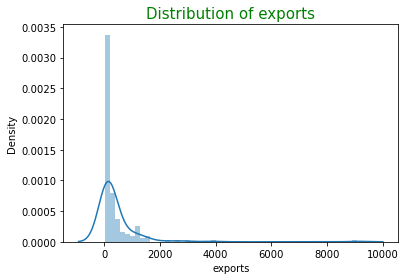

In [42]:
# Distplot for exports
distplot('exports',data)

## Insights:

   - As shown above exports feature is right skewed. Which is quite common since some countries have the highest exports due to highly developed manufacturing and farming capabilities and many other reasons can make the countries exports high  
   - exports feature has right skewed data considering this may affect the model's perfomance

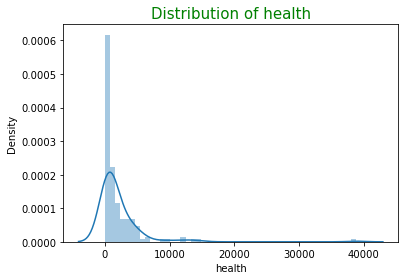

In [43]:
# Distplot for health
distplot('health',data)

## Insights:

   - As shown above health feature is right skewed, considering this may affect the model's perfomance lets cap the feature to 0.95 in further steps
   - Capping the outlier is the best option since we have less data

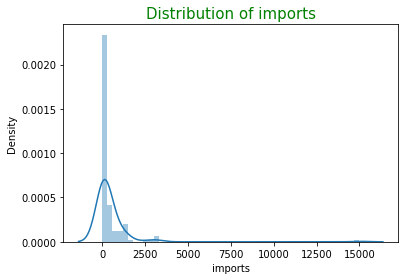

In [44]:
# Distplot for imports
distplot('imports',data)

## Insights:

   - As shown above imports feature is right skewed. Which is quite common since some countries has less farming lands,Industries and raw materials,Due to which these countries relay on imports  
   - imports feature has right skewed data considering this may affect the model's perfomance,lets cap the outliers in the next step.

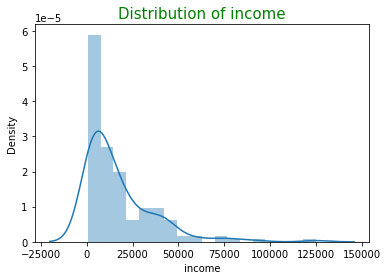

In [45]:
# distplot for income
distplot('income',data)

## Insights:

   - income feature says about net income of the person in the country
   - As shown above income feature is right skewed. Which is quite common since some countries has less jobs due to which many of the citizens will be unemployed  
   - income feature has right skewed data considering this may affect the model's perfomance,lets cap the outliers in the next step.

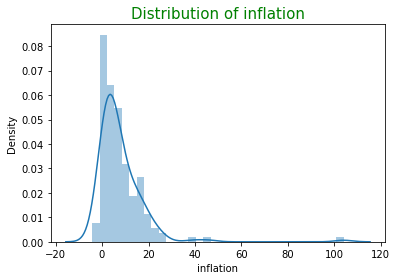

In [46]:
# Distplot for inflation
distplot('inflation',data)

## Insights:
   - inflation is all about the measurement of the annual growth rate of the Total GDP 
   - As shown above inflation feature is right skewed.When inflation gets higher,economic growth will decelerate resulting in cost of living drastically changes
   - This is one of the strong indicator for people required aid due to cost of living is very high when inflation is high

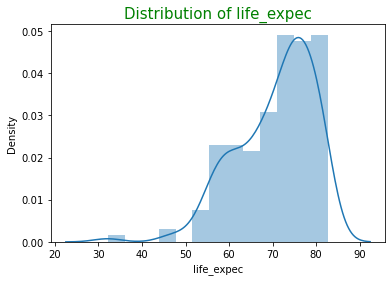

In [47]:
#Distplot for life expectency
distplot('life_expec',data)

## Insights:

   - life_expec feature says about the average number of years a new born child would live if the current mortality patterns are to remain the same
   - As shown above life_expec feature is left skewed.Average human life expectancy for some counries looks weird we need to treat the left skewed data where outliers are present,Lets cap the outliers in the next step.

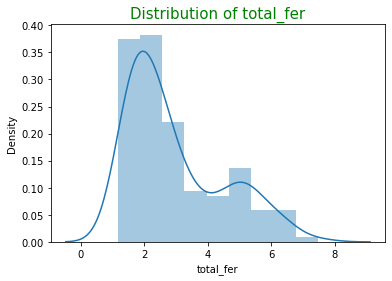

In [48]:
# Distplot for total fertility
distplot('total_fer',data)

## Insights:

   - total_fer feature says about the the number of children that would be born to each woman if the current age-fertility rates remain the same.

   - As shown above total_fer feature is right skewed very slightly.Which doesn't require any outlier treatment

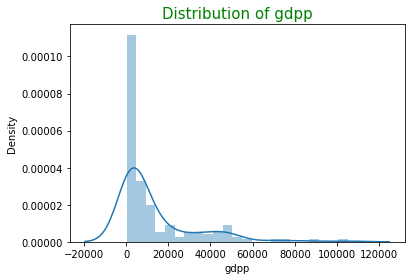

In [49]:
# Distplot for GDP per capita
distplot('gdpp',data)

## Insights:

   - gdpp feature says about the GDP per capita. Calculated as the Total GDP divided by the total population.
   - As shown above gdpp feature is right skewed. Which is quite common since some developed countries have high GDP.
   - Majority of the countries have GDP less than 10000
   - gdpp feature has right skewed data considering this may affect the model's perfomance,lets cap the outliers in the next step.

Here Outlier Treatment can bedone by deleting the outliers or Capping the outliers. Here Deleting may lead to the removal of some countries from the lsit which deserve Financial Aid. If the Outliers are not treated it may effect the clustering.

Thus, instead of deleting the outliers, we will approach to cap only the necessary features ( upper or lower based on feature importance). The capping will be done based on 1% for lower and 99% for the upper values

## Capping outlier: Since we have less data we are capping the data instead of dropping the outliers

### We are not capping some of the features because of the following reason:

  - `life_expec` is not heavily skewed.so we are not treating outliers in this feature.
  
  - `child_mort` tells the needs of aid. so there may be countries which are very high in number in child_mort which might be true need and lets not drop or cap the outliers here
  - `total_fer` is not heavily skewed as observed in the above plots so no treatment of outlier is required
  - `inflation` has some negative values and not hevaily skewed in the positive range. So we are not cappping them

## Lets Treat the columns which are highly skewed,Lets cap the outliers which are less than 0.05 percentile and greater than 0.95 percentile

Distribution of Features before perfroming capping on outliers


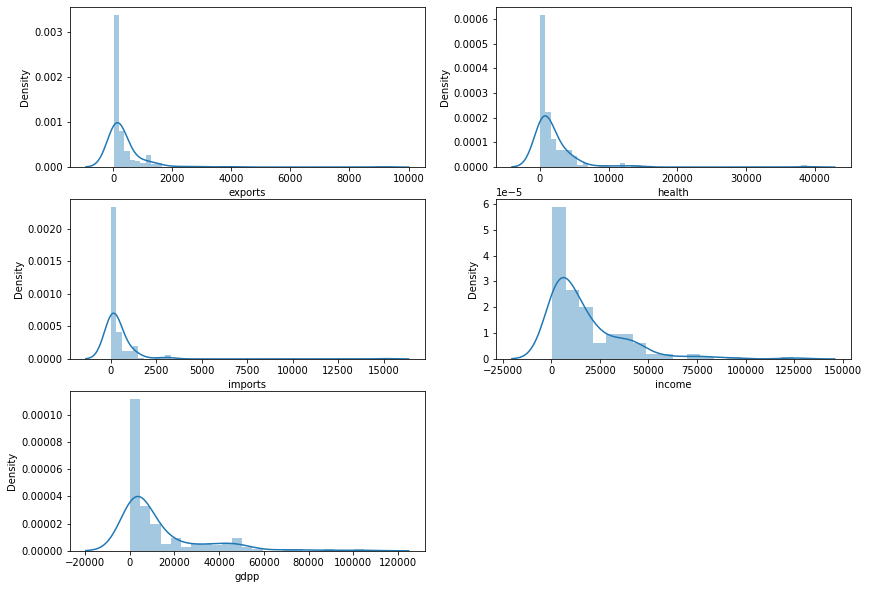

In [50]:
# split1 hold feature names which helps in capping the outliers

split1=['exports','health','imports','income','gdpp']
len_split1=len(split1)  # length/count of the features

plt.figure(figsize=(14,10))

print('Distribution of Features before perfroming capping on outliers')
for i,j in zip(split1,range(len_split1)): 
    plt.subplot(3,2,j+1)
    sns.distplot(data[i])   # Distribution plot

## Insights:

   - Above plot shows the distribution of features `exports`, `health`,`imports`,`income` and `gdpp` before perfoming capping to treat outliers.
   - Insights of each column/feature we are considering here is already explained in previous steps where we studied about distribution of plots.

## Look for different percentile values before capping the outliers

In [51]:
# split1 hold feature names which helps in capping the outliers

split1=['exports','health','imports','income','gdpp']
len_split1=len(split1)
print('Percentile values before capping the outliers\n')
for i,j in zip(split1,range(len_split1)):
    print('Percentile values before capping the outliers for '+ i +' is :\n', data[i].quantile([0,0.05,0.1,0.9,0.95,0.99,1]))
    print()

Percentile values before capping the outliers

Percentile values before capping the outliers for exports is :
 0.00       8.126521
0.05      18.775585
0.10      26.058542
0.90    1118.408984
0.95    1408.274232
0.99    3285.096774
1.00    9064.220183
Name: exports, dtype: float64

Percentile values before capping the outliers for health is :
 0.00       19.913793
0.05       68.104598
0.10      111.055810
0.90     4474.001885
0.95     6324.374720
0.99    13896.105231
1.00    38839.779006
Name: health, dtype: float64

Percentile values before capping the outliers for imports is :
 0.00        3.531317
0.05       11.009345
0.10       14.949710
0.90     1168.742004
0.95     1378.819905
0.99     3145.763158
1.00    14992.412747
Name: imports, dtype: float64

Percentile values before capping the outliers for income is :
 0.00       609.0
0.05      1213.0
0.10      1524.0
0.90     41220.0
0.95     48290.0
0.99     84374.0
1.00    125000.0
Name: income, dtype: float64

Percentile values before

## Insights:

   - In the above step we analysed the different percentiles like (0.05,0.95,1) features `exports`, `health`,`imports`,`income` and `gdpp` before perfoming capping to treat outliers.
   - Lets cap the data for the following features `exports`, `health`,`imports`,`income` and `gdpp` at 0.05 for percentiles having less than 0.05 and 0.95 for percentiles having greater than 0.95 percentiles 

## Perform capping on the features

In [52]:
# split1 hold feature names which helps in capping the outliers

split1=['exports','health','imports','income','gdpp']
len_split1=len(split1)

for i,j in zip(split1,range(len_split1)):
    percentilevalues = data[i].quantile([0.05,0.95]).values
    data[i] = np.clip(data[i], percentilevalues[0], percentilevalues[1])  # Replace the original features after capping the data 
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.300000,72.955145,12.316258,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,146.071429,624.427481,84.156379,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,116.145833,1069.544365,142.038217,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,56.661316,1238.596491,82.284382,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,268.131868,2023.217247,207.130730,19100.0,1.44,76.8,2.13,12200.0


## Insights:

   - In the above step we have capped the outliers for the following features `exports`, `health`,`imports`,`income` and `gdpp` 
   - Lets see the distribution plot to analyse how the skewness has been changed after this step

In [53]:
split1=['exports','health','imports','income']
len_split1=len(split1)

print('Percentile values After capping the outliers\n')
for i,j in zip(split1,range(len_split1)):
    print('percentile values After applying capping for '+ i +' is :\n', data[i].quantile([0,0.05,0.1,0.9,0.95,0.99,1]))
    print()

Percentile values After capping the outliers

percentile values After applying capping for exports is :
 0.00      18.775585
0.05      19.182383
0.10      26.058542
0.90    1118.408984
0.95    1399.621749
0.99    1408.274232
1.00    1408.274232
Name: exports, dtype: float64

percentile values After applying capping for health is :
 0.00      68.104598
0.05      68.568515
0.10     111.055810
0.90    4474.001885
0.95    6210.567459
0.99    6324.374720
1.00    6324.374720
Name: health, dtype: float64

percentile values After applying capping for imports is :
 0.00      11.009345
0.05      11.176107
0.10      14.949710
0.90    1168.742004
0.95    1364.256502
0.99    1378.819905
1.00    1378.819905
Name: imports, dtype: float64

percentile values After applying capping for income is :
 0.00     1213.0
0.05     1215.1
0.10     1524.0
0.90    41220.0
0.95    47513.0
0.99    48290.0
1.00    48290.0
Name: income, dtype: float64



## Insights:

   - In the above step we analysed the different percentiles like (0.05,0.95,1) features `exports`, `health`,`imports`,`income` and `gdpp` After perfoming capping to treat outliers.
   - capping has been in the following way values less than 0.05 percentile has been capped to 0.05 percentile value,Values greater than 0.95 has been capped to 0.95 th percentile value

Distribution of Features After perfroming capping on outliers


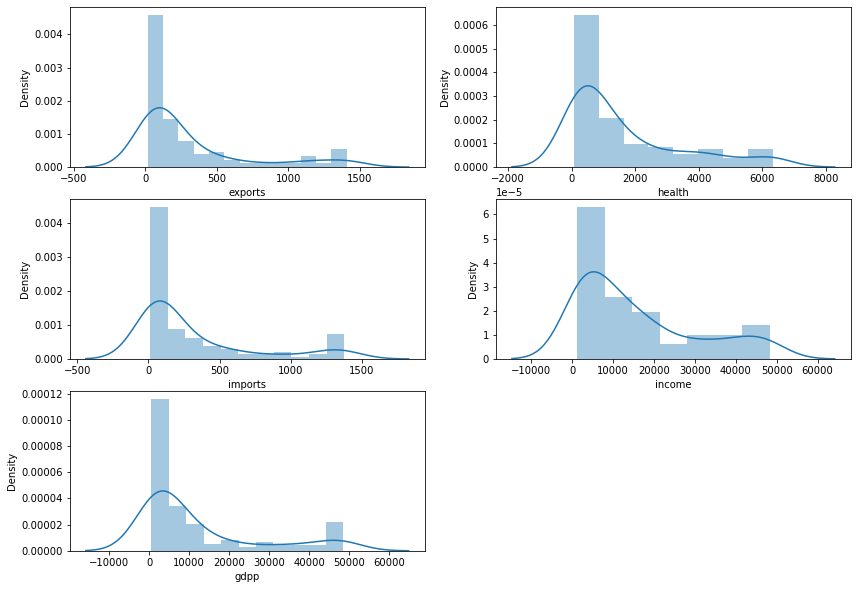

In [54]:
# split1 hold feature names which helps in capping the outliers

split1=['exports','health','imports','income','gdpp']
len_split1=len(split1)  # length/count of the features

plt.figure(figsize=(14,10))

print('Distribution of Features After perfroming capping on outliers')
for i,j in zip(split1,range(len_split1)): 
    plt.subplot(3,2,j+1)
    sns.distplot(data[i])   # Distribution plot

## Insights:

   - Now the skewness of the data has been reduced, Which is good for building the clusters
   - Majority of the skewed data has been treated now

# 6.Bivariate  and Multivariate Analyssis

## Numeric - Numeric analysis

- There are three ways to analyse the *`numeric- numeric`* data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

### Lets visualise the correlation between variables

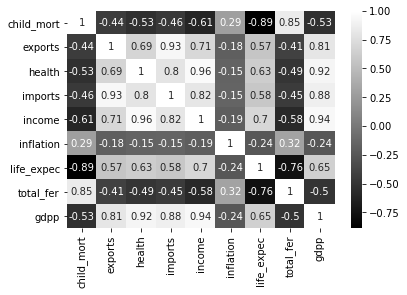

In [55]:
sns.heatmap(data.iloc[:,1:].corr(),cmap='gray',cbar=True,annot=True)
plt.show()

## Insights:

   - As shown above we have plotted correlation values using heatmap.which helps in further understanding which variables are highly correlated
   - Lets see the top correlated variables in the next step

In [56]:
# Top correlated variables
data.corr().abs().unstack().sort_values(ascending= False)[9:30]

health      income        0.958006
income      health        0.958006
gdpp        income        0.941514
income      gdpp          0.941514
imports     exports       0.933897
exports     imports       0.933897
gdpp        health        0.922333
health      gdpp          0.922333
life_expec  child_mort    0.886676
child_mort  life_expec    0.886676
imports     gdpp          0.876639
gdpp        imports       0.876639
total_fer   child_mort    0.848478
child_mort  total_fer     0.848478
income      imports       0.815486
imports     income        0.815486
gdpp        exports       0.809859
exports     gdpp          0.809859
imports     health        0.799945
health      imports       0.799945
total_fer   life_expec    0.760875
dtype: float64

## Insights:

   - As shown above we have arrived at features having high correlation values
   - `income` and `health` has highest correlation among all the features
   - `income` and `gdpp` has the second highest correlation with the value of 0.94151
   - `imports` and `exports` has the third highest correlation with the correlation value of 0.933

In [57]:
# reusable method for bivariate analysis
def bi_anal(feature1,feature2):
    plt.title('Data Distribution of '+ feature1+ ' versus ' + feature2,size=15,color='green')
    sns.scatterplot(feature1,feature2,data=data)
    plt.xlabel(feature1,size=12)
    plt.ylabel(feature2,size=12)
    plt.show()

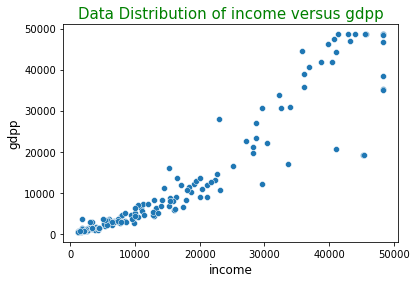

In [58]:
bi_anal('income','gdpp')

## Insights:

   - As shown in the above plot `gdpp` and `income` has highest correlation as the income increases gdpp also increases linearly
    

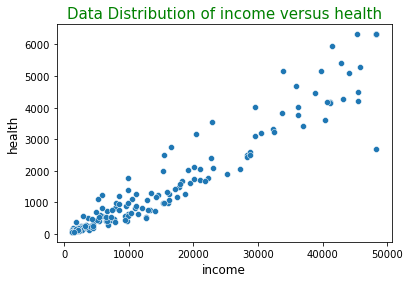

In [59]:
bi_anal('income','health')

## Insights:

   - As we have seen in the correlation matrix we have high correlation values for `income` and `health`,We could see that as the average income of the person increases Total health spending also increases

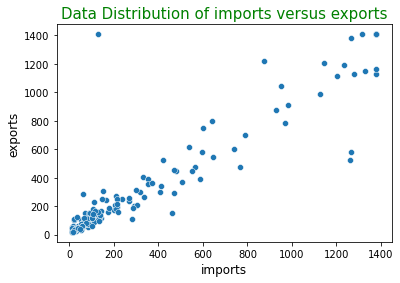

In [60]:
bi_anal('imports','exports')

## Insights:

   - As we have seen in the correlation matrix we have high correlation values for `imports` and `exports`.
   - There is a equal chances for countries to have higher import and export values since all the countries might not be     good in all the goods and due to lack of resources there is a goods exchange tackes place between countries.

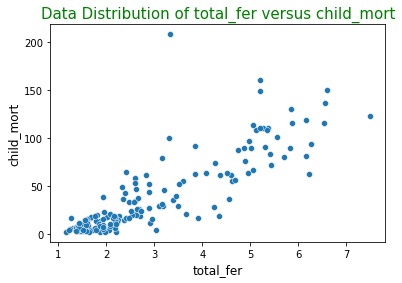

In [61]:
bi_anal('total_fer','child_mort')

## Insights:
   - `total_fer` tells about the number of children that would be born to each woman if the current age-fertility rates remain the same. 
   - As the `total_fer` increase `child_mort` increases this is quite obvious since both the varibales are positively correlated

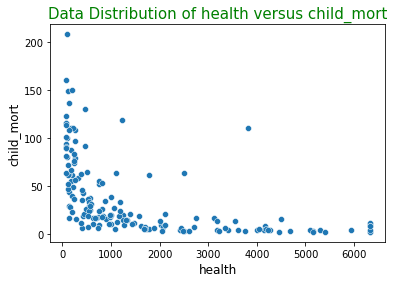

In [62]:
bi_anal('health','child_mort')

## Insights:

   - From the above plot we could understand that when the `health`(Total health spending per capita) increase child_mort decreases.
   - Less spending of `health` Increase in `child_mort`.

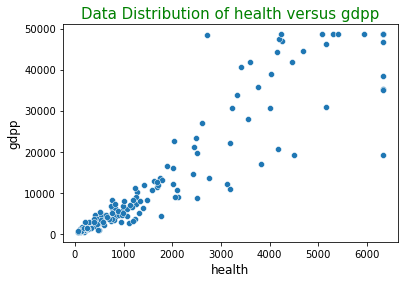

In [63]:
bi_anal('health','gdpp')

## Insights:

  - Feature `health` tells about the Total health spending per capita.
  - We can consider high GDP for developed countries where usually the average income and health spending will increase,Due to which we can see health and GP is correlated.

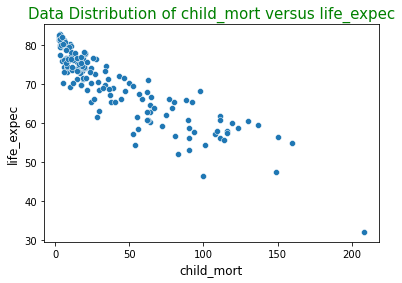

In [64]:
bi_anal('child_mort','life_expec')

## Insights:

   - As we can see when `life_expec` is high `child_mort` is low which is quite obvious since child_mort tells about the Death of children under 5 years of age per 1000 live births.
   - So both the variables are negatively correlated


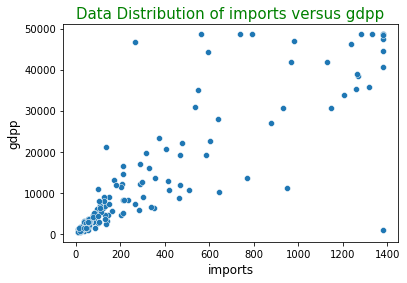

In [65]:
bi_anal('imports','gdpp')

## Insights:

    - GDP and imports are linearly related when the imports are at lower range GDP is also low.
    - As the imports increases GDP also increases linearly.
    - But we need to consider multiple factors when calclulating GDP

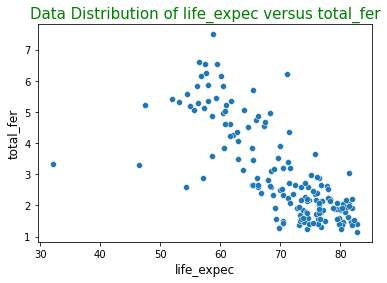

In [66]:
bi_anal('life_expec','total_fer')

## Insights:

  - we could that the life_expec is more when the ferility is less but we cannot conclude anything since the data we have has high range of life_expec values and total_fer value is high between 1to 5 as we observed in the total_fer box plot

In [67]:
# Create a new dataframe data1 which holds features other than country column
data1=data.iloc[:,1:]
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.300000,72.955145,12.316258,1610.0,9.44,56.2,5.82,553.0
1,16.6,146.071429,624.427481,84.156379,9930.0,4.49,76.3,1.65,4090.0
2,27.3,116.145833,1069.544365,142.038217,12900.0,16.10,76.5,2.89,4460.0
3,119.0,56.661316,1238.596491,82.284382,5900.0,22.40,60.1,6.16,3530.0
4,10.3,268.131868,2023.217247,207.130730,19100.0,1.44,76.8,2.13,12200.0


## 7.Hopkins Test

### Hopkins analysis to understand how well our data is suitable for clustering

Hopkins test, a statistical test for spatial randomness of a variable, can be used to measure the probability of data points generated by uniform data distribution.

Null Hypothesis (Ho) : Data points are generated by uniform distribution (implying no meaningful clusters)

Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)

If H>0.5, null hypothesis can be rejected and it is very much likely that data contains clusters. If H is more close to 0, then data set doesn’t have clustering tendency.

In [68]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values) 
    rand_X = sample(range(0, n, 1), m) 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1]) 
    HO = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HO):
        print(ujd, wjd)
        HO = 0
 
    return HO

In [69]:
# verify hopkins value 10 times/multiple times to make sure our data is well suited for clustering
for i in range(10):
    print(hopkins(data1))

0.9078150970876773
0.9238783948392448
0.8609559200254743
0.9311315135138168
0.8440732425115488
0.9075037309208489
0.8506391601166564
0.937258878195353
0.8742900149898312
0.9245524741608647


## Insights:

   - We are considering all the columns and lets see how Hopkins analysis say about how well data is suitable for clustering

## Lets analyse the features:  `child_mort`,`gdpp` and `income` and form clusters using these features

In [70]:
# Create a new dataframe data2 which holds following features: gdpp,child_mortality and income
data2=data[['gdpp','child_mort','income']]
data2.head()

,gdpp,child_mort,income
0,553.0,90.2,1610.0
1,4090.0,16.6,9930.0
2,4460.0,27.3,12900.0
3,3530.0,119.0,5900.0
4,12200.0,10.3,19100.0


In [71]:
# verify hopkins value 10 times/multiple times to make sure our data is well suited for clustering
for i in range(10):
    print(hopkins(data2))

0.9144500650300472
0.8921542738754551
0.9631893102053389
0.9063282517916013
0.8700506403462116
0.8837512448019118
0.9474366549796782
0.8270235474232649
0.9095988583545421
0.9354632532739601


## Insights:

   - Value of Hopkins is always greater than 0.85 even after executing 10 times, which is strong indicator that data is suitable for cluster formation
   

In [72]:
data2.corr()

,gdpp,child_mort,income
gdpp,1.000000,-0.529439,0.941514
child_mort,-0.529439,1.000000,-0.608389
income,0.941514,-0.608389,1.000000


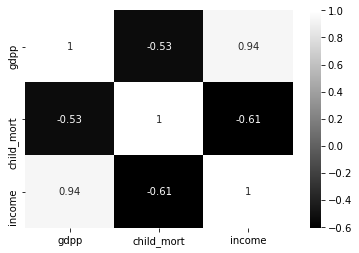

In [73]:
sns.heatmap(data2.corr(),cmap='gray',cbar=True,annot=True)
plt.show()

## Insights:

   - As observed in the above heatmap we have high correlation at 0.94 between `gdpp` and `income` feature
   - `child_mort` and `income` features have a high correlation value

In [74]:
# Importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

# 8.Finding optimal k value for kmeans

### FInding optimal k value with within cluster sum of squares method

In [75]:
# Import KMeans
from sklearn.cluster import KMeans

## Optimal cluster identification using within cluster sum of squares

[74338476327.22551, 14887624127.694551, 7577826373.24731, 4074273810.60312, 3059300694.959563, 2488179444.2437053, 1987964804.051041, 1572473797.9669082, 1282240006.0644464, 1013461757.3197728, 858776985.557562, 744802399.9619212, 672266825.1885879, 605319267.1048464]


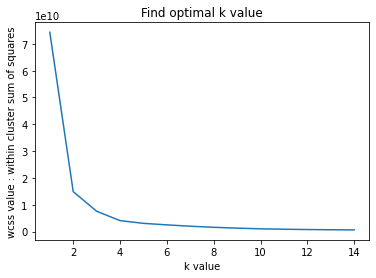

In [76]:
wcss=[]  # wcss is a empty list indicates within cluster sum of squares
k=range(1,15)
for i in k:
    kmeans=KMeans(i,random_state=42)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(k,wcss)                                                      #plot the diagram in the form of x and y 
plt.title("Find optimal k value")
plt.xlabel("k value")
plt.ylabel("wcss value : within cluster sum of squares")
plt.show()

## Insights:

   - As we can see at value k=3 and k=2 looks we have optimal value of k
   - using this k value lets analyse the spread of data explained by clustersand decide the better k value for our model

In [77]:
# Verify that the data2 has only three columns before applying clustering on that
data2.head()

,gdpp,child_mort,income
0,553.0,90.2,1610.0
1,4090.0,16.6,9930.0
2,4460.0,27.3,12900.0
3,3530.0,119.0,5900.0
4,12200.0,10.3,19100.0


## `K=2`

In [78]:
# Fithe data with k=2 clusters
kmeans=KMeans(2,random_state=42)
kmeans.fit(data2)

KMeans(n_clusters=2, random_state=42)

## Insights:

   - We have taken 2 clusters and data has been fitted on that lets see the cluster count across the data in next steps

In [79]:
# stire the cluster labels in the variable y_kmeans
y_kmeans=kmeans.fit_predict(data2)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [80]:
# Add the cluster column to the dataframe : data2
data2['cluster']=y_kmeans
data2.head()

,gdpp,child_mort,income,cluster
0,553.0,90.2,1610.0,0
1,4090.0,16.6,9930.0,0
2,4460.0,27.3,12900.0,0
3,3530.0,119.0,5900.0,0
4,12200.0,10.3,19100.0,0


## Insights:

   - We have added cluster labels in the previous step to the dataframe data2

In [81]:
data2.cluster.value_counts()

0    128
1     39
Name: cluster, dtype: int64

## Insights:

   - cluster 0 count is 128 and cluster 1 count is 39.
   - Cluster 0 is having many data points we can go for other cluster value which is k=3 and see if that can explain the datapoints better than this cluster

In [82]:
# Lets remove the cluster column from data2 before fitting the data2 to kmeans algorithm
data2=data2.iloc[:,:-1]
data2.head()

,gdpp,child_mort,income
0,553.0,90.2,1610.0
1,4090.0,16.6,9930.0
2,4460.0,27.3,12900.0
3,3530.0,119.0,5900.0
4,12200.0,10.3,19100.0


## `K=3`

In [83]:
# Fithe data with k=3 clusters
kmeans=KMeans(3,random_state=42)
kmeans.fit(data2)

KMeans(n_clusters=3, random_state=42)

## Insights:

   - We have taken 3 clusters and data has been fitted on that lets see the cluster count across the data in next steps

In [84]:
# stire the cluster labels in the variable y_kmeans
y_kmeans=kmeans.fit_predict(data2)
y_kmeans

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0])

## Insights:

   - As shown above we have got the cluster number to which each row of the data belong to.Lets add this cluster value to the dataframe

In [85]:
# Add the cluster column to the dataframe : data2
data2['cluster']=y_kmeans
data2.head()

,gdpp,child_mort,income,cluster
0,553.0,90.2,1610.0,0
1,4090.0,16.6,9930.0,0
2,4460.0,27.3,12900.0,0
3,3530.0,119.0,5900.0,0
4,12200.0,10.3,19100.0,2


In [86]:
data2.cluster.value_counts()

0    96
2    40
1    31
Name: cluster, dtype: int64

## Insights:

   - cluster 0 count is 96,cluster 1 count is 40 and cluster2 count is 31.
   - It looks when we considered k=3 clusters are explaining the data very well and data is not biased to a single cluster. So lets consider k value as 3

In [87]:
# cluster centers
kmeans.cluster_centers_

array([[2.44219896e+03, 5.83562500e+01, 5.29538542e+03],
       [4.04770968e+04, 5.64838710e+00, 4.20422581e+04],
       [1.28845000e+04, 1.53450000e+01, 2.04875000e+04]])

## Insights:
   - Cluster center values are displyed in the above step

In [88]:
# Add the cluster column to the dataframe : data2
data2['cluster']=y_kmeans
data2.head()

,gdpp,child_mort,income,cluster
0,553.0,90.2,1610.0,0
1,4090.0,16.6,9930.0,0
2,4460.0,27.3,12900.0,0
3,3530.0,119.0,5900.0,0
4,12200.0,10.3,19100.0,2


In [89]:
# Add the country column to the dataframe : data2
data2['country']=data['country']
data2.head()

,gdpp,child_mort,income,cluster,country
0,553.0,90.2,1610.0,0,Afghanistan
1,4090.0,16.6,9930.0,0,Albania
2,4460.0,27.3,12900.0,0,Algeria
3,3530.0,119.0,5900.0,0,Angola
4,12200.0,10.3,19100.0,2,Antigua and Barbuda


## Insights:

   - In the above two steps we have added country and cluster lables to the dataframe data3 which helps in further steps in identifying which country falls under which cluster group.

## Before visualising the cluster lets find the optimal k value using Silhouette analysis

# Silhouette Analysis

## Optimal value of k can be obtained using silhouette_score

In [90]:
# scaling
# Create new dataframe data3  with features: gdpp, child_mort and income and apply minmax scaler
data2_columns=data2.iloc[:,:-2].columns
data3=pd.DataFrame(mm.fit_transform(data2.iloc[:,:-2]),columns=data2_columns)
data3.head()

,gdpp,child_mort,income
0,0.001809,0.426485,0.008433
1,0.075276,0.068160,0.185165
2,0.082961,0.120253,0.248253
3,0.063644,0.566699,0.099560
4,0.243729,0.037488,0.379952


## Insights:

    - Minmax scaling has been applied on the following features: `gdpp`,`child_mort` and `income`

In [91]:
#silhouette_score for finding optimal value of k 

from sklearn.metrics import silhouette_score

In [92]:
silhoutee_scores=[]
#k=range(1,10)
range_clusters=[2,3,4,5,6,7,8]
for i in range_clusters:
    kmeans=KMeans(i,random_state=25)
    kmeans.fit(data3)
    cluster_labels=kmeans.labels_
    silhouette=silhouette_score(data3,cluster_labels)
    silhoutee_scores.append(silhouette)
print(silhoutee_scores)

[0.6523912889388267, 0.5234165504355324, 0.5034208079370068, 0.47531874441214317, 0.4779945804542312, 0.4855127529225187, 0.4668665871199623]


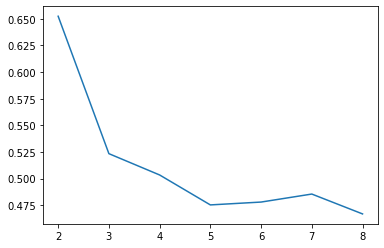

In [93]:
# plotting silhoutee scores for different clusters
plt.plot(range_clusters, silhoutee_scores)


## Insights:

   - As observed in the above analysis we have better silhouette score when k=2: 0.65 and k=3: 0.52
   - As we already observed the k value using ssd tells the same analysis but we saw better distribution of clusters when  k=3 in the above step. Lets consider k=3 as optimal calue and visualize the spread of clusters.       

### After verifying k values at 2 and 3 data is well explained when k=3

## Lets visualise the clusters

In [94]:
data2.head()

,gdpp,child_mort,income,cluster,country
0,553.0,90.2,1610.0,0,Afghanistan
1,4090.0,16.6,9930.0,0,Albania
2,4460.0,27.3,12900.0,0,Algeria
3,3530.0,119.0,5900.0,0,Angola
4,12200.0,10.3,19100.0,2,Antigua and Barbuda


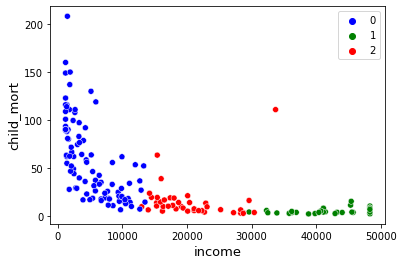

In [95]:
sns.scatterplot(x = 'income', y ='child_mort', hue = 'cluster', data =data2,palette=['blue','green','red'])
plt.xlabel('income',fontsize=13)
plt.ylabel('child_mort',fontsize=13)
plt.legend()
plt.show()

## Insights:

   - Plot shows that whereever income is low child_mortality is high which indicates average income to the person is strong indicator in mortality rate
   - Three clusters has been well explained in the data as shown above.
   - Cluster 0 will be our priority where we observed high child_mortality rate and less average income

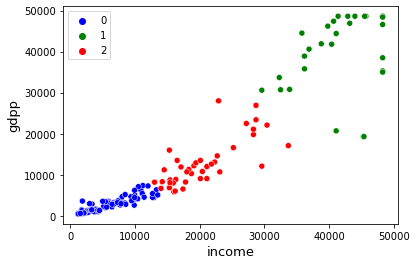

In [96]:
sns.scatterplot(x = 'income', y ='gdpp', hue = 'cluster', data =data2,palette=['blue','green','red'])
plt.xlabel('income',fontsize=13)
plt.ylabel('gdpp',fontsize=13)
plt.legend()
plt.show()

## Insights:

   - NetIncome per person looks linearly related with GDP of a country
   - When the average income of the person increases GDP gradually increases
   - We can consider countries with less average income and less gdpp wherethe trust can provide the funds and help them.      - As observed cluster 0 will be our criteria

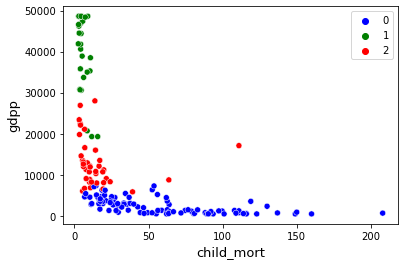

In [97]:
sns.scatterplot(x = 'child_mort', y ='gdpp', hue = 'cluster', data =data2,palette=['blue','green','red'])
plt.xlabel('child_mort',fontsize=13)
plt.ylabel('gdpp',fontsize=13)
plt.legend()
plt.show()

## Insights:

   - As observed in the above plot `child_mort` is high when `gdpp` is low
   - `gdpp` is a strong indicator for `child_mort`
   - As observed cluster 0 tells about high child mortality rate
   - In further steps we will filter the countries where this pattern is observed
   - We can concentrate on cluster 0 where child_mort is high and gdpp is less

In [98]:
# scaling
# Create new dataframe data3  with features: gdpp, child_mort and income and apply minmax scaler
data2_columns=data2.iloc[:,:-2].columns
data3=pd.DataFrame(mm.fit_transform(data2.iloc[:,:-2]),columns=data2_columns)
data3

,gdpp,child_mort,income
0,0.001809,0.426485,0.008433
1,0.075276,0.068160,0.185165
2,0.082961,0.120253,0.248253
3,0.063644,0.566699,0.099560
4,0.243729,0.037488,0.379952
...,...,...,...
162,0.052013,0.129503,0.036897
163,0.270731,0.070594,0.324723
164,0.017533,0.100779,0.069609
165,0.017533,0.261441,0.069397


## Insights:

   - After scaling the data we are storing them in data3 
   - We have applied the min max scaler in the previous step its good that we scale the data since considering the data without scaling will give high priority to higher values

In [99]:
# Add cluster value to data3
data3['cluster']=data2['cluster']
data3.head()

,gdpp,child_mort,income,cluster
0,0.001809,0.426485,0.008433,0
1,0.075276,0.068160,0.185165,0
2,0.082961,0.120253,0.248253,0
3,0.063644,0.566699,0.099560,0
4,0.243729,0.037488,0.379952,2


In [100]:
# Add country column to data3
data3['country']=data2['country']
data3.head()

,gdpp,child_mort,income,cluster,country
0,0.001809,0.426485,0.008433,0,Afghanistan
1,0.075276,0.068160,0.185165,0,Albania
2,0.082961,0.120253,0.248253,0,Algeria
3,0.063644,0.566699,0.099560,0,Angola
4,0.243729,0.037488,0.379952,2,Antigua and Barbuda


## Insights:

   - In the above two steps we have added country and cluster lables to the dataframe data3 which helps in further steps in identifying which country falls under which cluster group.

<AxesSubplot:xlabel='cluster'>

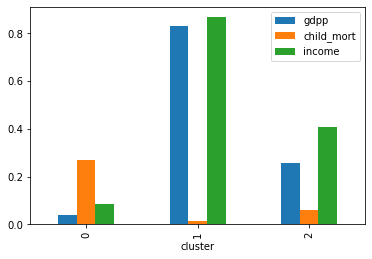

In [101]:
#group the clusters with the mean values of gdp,income and child_mort for each cluster for better visualization
data3.groupby('cluster').mean().plot(kind='bar')

## Insights:

   - Now we know that cluster 0 is having high child_mort, low income and gdpp these are the fields we need to concentrate to help the people in this region and provide help which requires help from charity/Trust.

### Considering cluster : 0 as priority in our scenario lets see which countries fall under cluster 0 which requires help when compared with countries

In [102]:
data3[data3['cluster']==0].sort_values(by=['child_mort','gdpp','income'],ascending=[False,True,True]).head()

,gdpp,child_mort,income,cluster,country
66,0.004073,1.000000,0.006096,0,Haiti
132,0.000000,0.766310,0.000149,0,Sierra Leone
32,0.008954,0.717624,0.015230,0,Chad
31,0.000000,0.712756,0.000000,0,Central African Republic
97,0.005029,0.654333,0.013956,0,Mali


## Insights:

   - Countries having High child_mortality rate, Low gdpp and low income is considred on priority where Trust can spend the money for needy people.
   - As shown above countries are kept in order which required Trust help on priority
   - The order of countries which require help is in the following order : `Haiti`,`Sierra Leone`,`Chad`, `Central African Republic` and ` Mali`

## 9.Hierarchical clustering

In [119]:
# import libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [120]:
# Dataframe which we will use in hierarchical clustering
data3.head()

,gdpp,child_mort,income,cluster,country,cluster_labels
0,0.001809,0.426485,0.008433,0,Afghanistan,0
1,0.075276,0.068160,0.185165,0,Albania,1
2,0.082961,0.120253,0.248253,0,Algeria,1
3,0.063644,0.566699,0.099560,0,Angola,0
4,0.243729,0.037488,0.379952,2,Antigua and Barbuda,1


## Agglomerative clustering
- Here we consider each data point as one cluster and we find the distance from each point to the other data points.Then the data points with minimum distance is formed as a cluster resulting in n-1 cluster
- This process iterates until all the data points are formed as a single cluster
- We can visualize the dendograms obtained which we will see in further steps
-https://towardsdatascience.com/introduction-hierarchical-clustering-d3066c6b560e

In [121]:
data3.iloc[:,:-2]

,gdpp,child_mort,income,cluster
0,0.001809,0.426485,0.008433,0
1,0.075276,0.068160,0.185165,0
2,0.082961,0.120253,0.248253,0
3,0.063644,0.566699,0.099560,0
4,0.243729,0.037488,0.379952,2
...,...,...,...,...
162,0.052013,0.129503,0.036897,0
163,0.270731,0.070594,0.324723,2
164,0.017533,0.100779,0.069609,0
165,0.017533,0.261441,0.069397,0


### single linkage

 method='single' assigns

    .. math::
       d(u,v) = \min(dist(u[i],v[j]))

    for all points :math:`i` in cluster :math:`u` and
    :math:`j` in cluster :math:`v`. This is also known as the
    Nearest Point Algorithm.

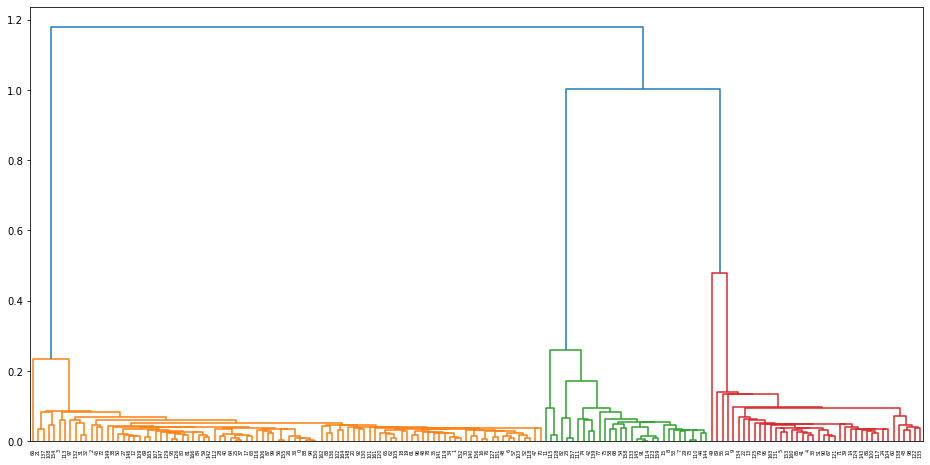

In [122]:
# single linkage
plt.figure(figsize=(16,8))
single_linkage=linkage(data3.iloc[:,:-2],method='single',metric='euclidean')   #single linkage method
dendrogram(single_linkage)  #This prints the dendograms 
plt.show()          #display the dendogram on the screen

## Insights:

- As seen in the above diagram the dendogram is tightly coupled lets try other linkage methods like complete and average linkage methods

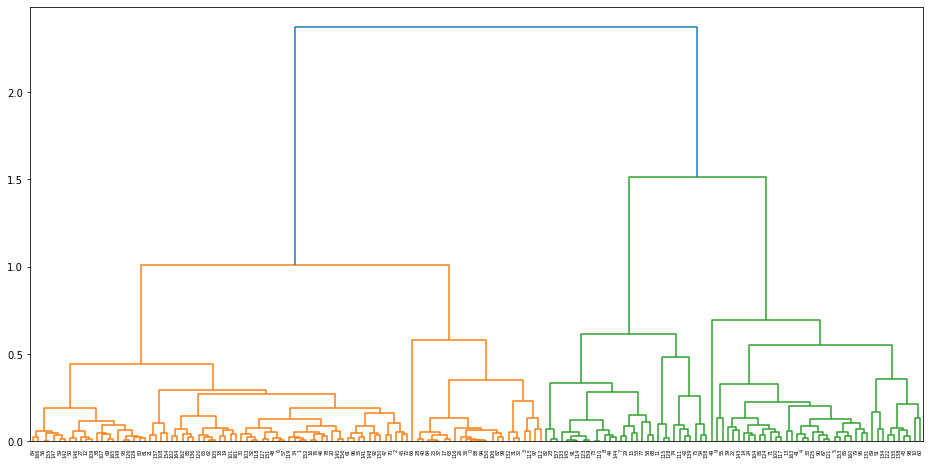

In [123]:
# complete linkage
plt.figure(figsize=(16,8))
complete_linkage=linkage(data3.iloc[:,:-2],method='complete',metric='euclidean')   #Complete linkage method
dendrogram(complete_linkage)  #This prints the dendograms 
plt.show()          #display the dendogram

## Insights:

- We could see that complete linkage performe better than sngle linkage and clear dendograms has been formed, Lets cut the tree at different levels and find the optimal cluster value

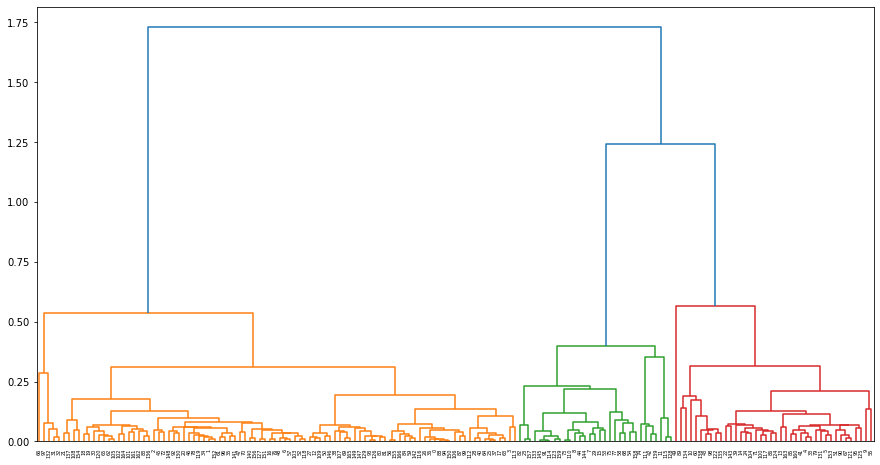

In [124]:
# centroid linkage method
plt.figure(figsize=(15,8))
centroid_linkage=linkage(data3.iloc[:,:-2],method='centroid',metric='euclidean')   #Centroid linkage method 
dendrogram(centroid_linkage)  #this prints the dendograms 
plt.show()  

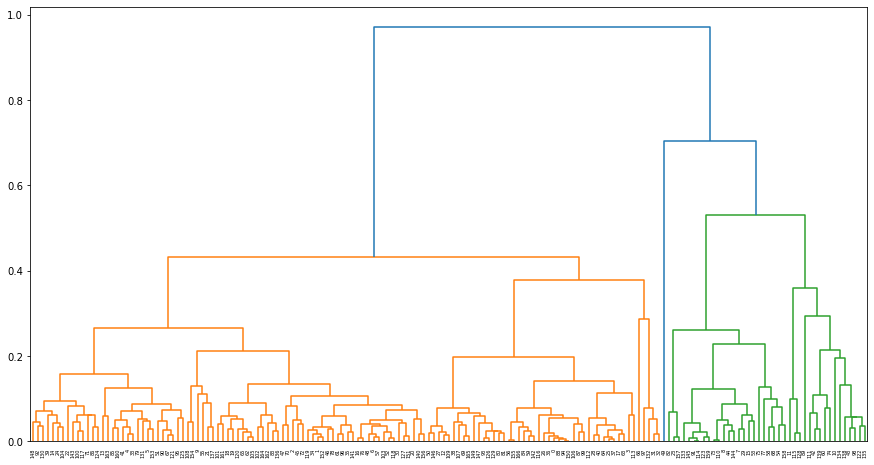

In [107]:
# average linkage
plt.figure(figsize=(15,8))
avg_linkage=linkage(data3.iloc[:,:-2],method='average',metric='euclidean')   #Average linkage method 
dendrogram(avg_linkage)  #this prints the dendograms 
plt.show()          #display the dendogram

## Insights:

- We have obtained Dendogrames for Single linkage, Complete linkage and average linkage tree.
- Lets cut the tree to obtain the k value at 3 and 2.Then we can come to conclusion which is performng better   

## `n_clusters=2` With complete Linkage method

In [108]:
cluster_labels=cut_tree(complete_linkage,2).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

## Insights:
- Now we got cluster labels when number of cluster is 2

In [109]:
# Add the cluster lables to the dataframe 'data3'
data3['cluster_labels']=cluster_labels
data3

,gdpp,child_mort,income,cluster,country,cluster_labels
0,0.001809,0.426485,0.008433,0,Afghanistan,0
1,0.075276,0.068160,0.185165,0,Albania,0
2,0.082961,0.120253,0.248253,0,Algeria,0
3,0.063644,0.566699,0.099560,0,Angola,0
4,0.243729,0.037488,0.379952,2,Antigua and Barbuda,0
...,...,...,...,...,...,...
162,0.052013,0.129503,0.036897,0,Vanuatu,0
163,0.270731,0.070594,0.324723,2,Venezuela,0
164,0.017533,0.100779,0.069609,0,Vietnam,0
165,0.017533,0.261441,0.069397,0,Yemen,0


In [110]:
# Verify the count of cluster lables in data3
data3.cluster_labels.value_counts()

0    129
1     38
Name: cluster_labels, dtype: int64

## Insights:
- As observed we have 129 countries which fall unders cluster 0 and 38 countries which fall under cluster 1

## `n_clusters=3` with Complete Linkage Method

In [111]:
cluster_labels=cut_tree(complete_linkage,3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])

## Insights:
- Now we got cluster labels when number of cluster is 3

In [112]:
data3['cluster_labels']=cluster_labels
data3

,gdpp,child_mort,income,cluster,country,cluster_labels
0,0.001809,0.426485,0.008433,0,Afghanistan,0
1,0.075276,0.068160,0.185165,0,Albania,1
2,0.082961,0.120253,0.248253,0,Algeria,1
3,0.063644,0.566699,0.099560,0,Angola,0
4,0.243729,0.037488,0.379952,2,Antigua and Barbuda,1
...,...,...,...,...,...,...
162,0.052013,0.129503,0.036897,0,Vanuatu,1
163,0.270731,0.070594,0.324723,2,Venezuela,1
164,0.017533,0.100779,0.069609,0,Vietnam,1
165,0.017533,0.261441,0.069397,0,Yemen,1


In [113]:
data3.cluster.value_counts()

0    96
2    40
1    31
Name: cluster, dtype: int64

## Insights:
- As observed we have 96 countries fall unders cluster 0, 31 countries fall under cluster1 and 40 countries fall under cluster 2

In [114]:
data3.head()

,gdpp,child_mort,income,cluster,country,cluster_labels
0,0.001809,0.426485,0.008433,0,Afghanistan,0
1,0.075276,0.068160,0.185165,0,Albania,1
2,0.082961,0.120253,0.248253,0,Algeria,1
3,0.063644,0.566699,0.099560,0,Angola,0
4,0.243729,0.037488,0.379952,2,Antigua and Barbuda,1


In [115]:
# Create a new dataframe data4 which holds gdpp,child_mort,income,country and cluster_labels column
data4=data3.drop('cluster',axis=1)#[['gdpp','child_mort','income','cluster_labels']]
data4

,gdpp,child_mort,income,country,cluster_labels
0,0.001809,0.426485,0.008433,Afghanistan,0
1,0.075276,0.068160,0.185165,Albania,1
2,0.082961,0.120253,0.248253,Algeria,1
3,0.063644,0.566699,0.099560,Angola,0
4,0.243729,0.037488,0.379952,Antigua and Barbuda,1
...,...,...,...,...,...
162,0.052013,0.129503,0.036897,Vanuatu,1
163,0.270731,0.070594,0.324723,Venezuela,1
164,0.017533,0.100779,0.069609,Vietnam,1
165,0.017533,0.261441,0.069397,Yemen,1


## Lets Group the data based on cluster labels

<AxesSubplot:xlabel='cluster_labels'>

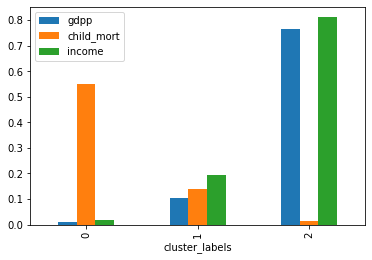

In [116]:
# Group the dataframe by cluster_labels
data4.groupby('cluster_labels').mean().plot(kind='bar')

## Insights:

- Cluster 0 is having high `child_mort`,less`gdpp` and `income` which is a good indicator for the people required in aid.
- Cluster 0 can be concentrated to provide help to the people in that countries which are in need

In [117]:
# Filter the cluster 0 labels includes country names
data4[data4.cluster_labels==0]

,gdpp,child_mort,income,country,cluster_labels
0,0.001809,0.426485,0.008433,Afghanistan,0
3,0.063644,0.566699,0.099560,Angola,0
17,0.006067,0.527751,0.012894,Benin,0
25,0.002266,0.552093,0.004609,Burkina Faso,0
26,0.000000,0.443038,0.000000,Burundi,0
28,0.017533,0.513145,0.030737,Cameroon,0
31,0.000000,0.712756,0.000000,Central African Republic,0
32,0.008954,0.717624,0.015230,Chad,0
36,0.006296,0.416748,0.004185,Comoros,0
37,0.000000,0.552093,0.000000,"Congo, Dem. Rep.",0


# Top 5 countries which requires help 

In [118]:
# Top 5 countries which requires help
# sorted the data and obtained top 5 countries that need help
data4[data4['cluster_labels']==0].sort_values(by=['child_mort','gdpp','income'],ascending=[False,True,True]).head()

,gdpp,child_mort,income,country,cluster_labels
66,0.004073,1.000000,0.006096,Haiti,0
132,0.000000,0.766310,0.000149,Sierra Leone,0
32,0.008954,0.717624,0.015230,Chad,0
31,0.000000,0.712756,0.000000,Central African Republic,0
97,0.005029,0.654333,0.013956,Mali,0


# Reasons for Aid:

- High child mortality
- Low Income
- Low GDP
- Low health spent
- High Inflation

## Insights:
- HELP International can concentrate on this top 5 countries on priority in fighting the poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 
- As shown above countries are kept in order which required Trust help on priority
- The order of countries which require help is in the following order : `Haiti`,`Sierra Leone`,`Chad`, `Central African Republic` and ` Mali`
- We can cut the tree at different level to obtain different cluster value based on business understanding

## Overall Insights:
- HELP International can concentrate on this Top 5 countries which are in need of help.The order of countries which require help is in the following order : `Haiti`,`Sierra Leone`,`Chad`, `Central African Republic` and ` Mali`.
